In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt

### 1. Create a directed graph

In [3]:
graph = nx.read_edgelist("connections.txt", create_using=nx.DiGraph(directed=True), nodetype=int)
ud_graph = nx.read_edgelist("connections.txt", create_using=nx.Graph(), nodetype=int)

### 2. Which nodes are bridges?

In [4]:
list(nx.bridges(ud_graph))

[(0, 11),
 (0, 12),
 (0, 15),
 (0, 18),
 (0, 37),
 (0, 43),
 (0, 74),
 (0, 114),
 (0, 209),
 (0, 210),
 (0, 215),
 (0, 287),
 (0, 292),
 (0, 335),
 (107, 911),
 (107, 918),
 (107, 1096),
 (107, 1119),
 (107, 1145),
 (107, 1206),
 (107, 1386),
 (107, 1466),
 (107, 1560),
 (107, 1581),
 (107, 1834),
 (348, 358),
 (348, 447),
 (348, 550),
 (414, 585),
 (414, 602),
 (414, 607),
 (414, 608),
 (414, 613),
 (414, 624),
 (414, 638),
 (414, 668),
 (414, 674),
 (1684, 2842),
 (1684, 3031),
 (1684, 3071),
 (1684, 3183),
 (1684, 3230),
 (1912, 2079),
 (1912, 2195),
 (1912, 2269),
 (1912, 2457),
 (1912, 2470),
 (1912, 2569),
 (1912, 2596),
 (3437, 3451),
 (3437, 3453),
 (3437, 3570),
 (3437, 3650),
 (3437, 3709),
 (3437, 3729),
 (3437, 3748),
 (3437, 3798),
 (3437, 3820),
 (3437, 3853),
 (3437, 3856),
 (3437, 3935),
 (3437, 3974),
 (3980, 3984),
 (3980, 4008),
 (3980, 4010),
 (3980, 4015),
 (3980, 4022),
 (3980, 4024),
 (3980, 4035),
 (686, 692),
 (686, 801),
 (698, 875),
 (698, 883),
 (698, 891),


In [13]:
len(graph.nodes)

4039

### 3. Show the density of the graph

In [5]:
nx.density(graph)

0.0054099817517196435

the density value is quite low

### 4. Show which nodes have the highest and lowest number of connections.

In [15]:
print("Highest: ", sorted(graph.nodes, key=graph.degree)[-5:])

Highest:  ['0', '3437', '1912', '1684', '107']


In [16]:
print("Lowest: ", sorted(graph.nodes, key=graph.degree)[:5])

Lowest:  ['11', '12', '15', '18', '37']


### 5. Show which nodes have the highest incoming and outgoing connections

In [17]:
in_degrees = dict(graph.in_degree())
out_degrees = dict(graph.out_degree())

sorted_in = sorted(list(in_degrees.keys()), key=lambda x: in_degrees[x])
sorted_out = sorted(list(out_degrees.keys()), key=lambda x: out_degrees[x])

In [18]:
print("Highest in: ", sorted_in[-5:])
print("Highest out: ", sorted_out[-5:])

Highest in:  ['1827', '2611', '1800', '2543', '1888']
Highest out:  ['0', '3437', '1912', '1684', '107']


In [19]:
print("Lowest in: ", sorted_in[:5])
print("Lowest out: ", sorted_out[:5])

Lowest in:  ['0', '686', '1', '2', '3']
Lowest out:  ['11', '12', '15', '18', '37']


### 6. Show which nodes have the highest closeness, betweenness, and eigenvector
Interpret your findings

In [20]:
betweenness = nx.centrality.betweenness_centrality(graph)
highest_betweenness_nodes = sorted(graph.nodes, key=betweenness.get)

highest_betweenness_nodes[-5:]

['1405', '563', '1718', '1912', '1684']

In [21]:
closeness = nx.centrality.closeness_centrality(graph)
highest_closeness_nodes = sorted(graph.nodes, key=closeness.get)

highest_closeness_nodes[-5:]

['2543', '2643', '2629', '2649', '2642']

In [22]:
eigenvector = nx.centrality.eigenvector_centrality(graph, max_iter=90000)
highest_eigenvector_nodes = sorted(graph.nodes, key=eigenvector.get)

highest_eigenvector_nodes[-5:]

['2631', '2638', '2646', '2654', '2655']

### 7. Implement a community detection algorithm on the directed graph and show how many communities were created.

In [10]:
communities = sorted(nx.algorithms.community.greedy_modularity_communities(graph), key=len, reverse=True)
print(f"{len(communities)} communities found")

11 communities found


### 8. Show the largest and the smallest community. | Interpret your findings

In [12]:
for i, com in enumerate(communities):
    print(f'Community {i+1} has {len(com)} members')

Community 1 has 1001 members
Community 2 has 753 members
Community 3 has 747 members
Community 4 has 542 members
Community 5 has 363 members
Community 6 has 314 members
Community 7 has 208 members
Community 8 has 59 members
Community 9 has 38 members
Community 10 has 8 members
Community 11 has 6 members


There are a few niche communities with less than 50 members, but most communities are larger than 100 members

### Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

In [13]:
largest_c = communities[0]
smallest_c = communities[-1]

largests = [graph.subgraph(communities[i]) for i in range(3)]
smallest = graph.subgraph(smallest_c)

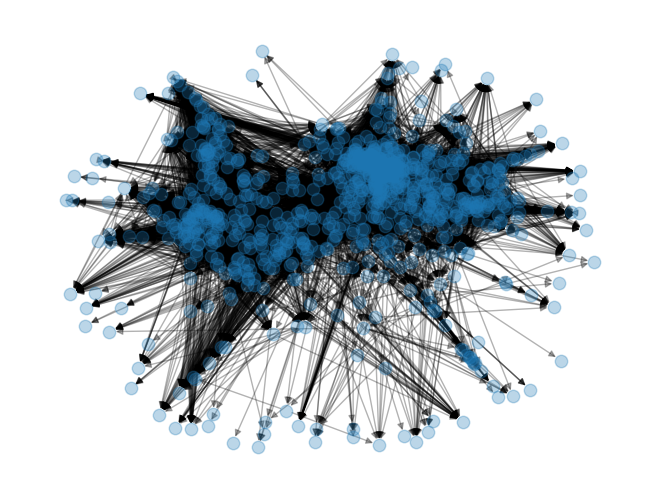

In [14]:
nx.draw(largests[0], node_size=80, alpha=0.3)

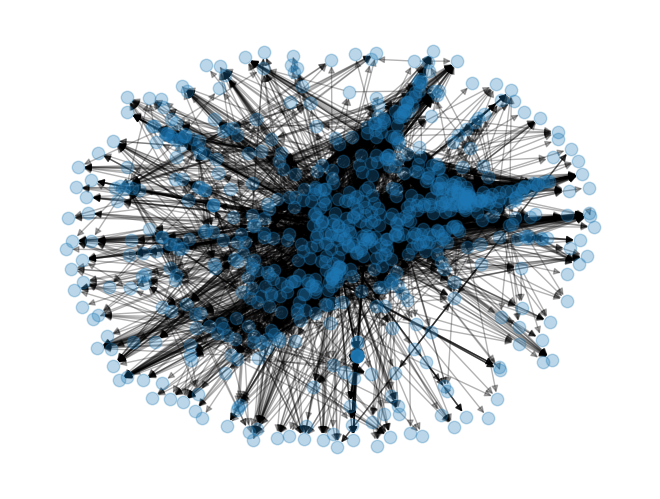

In [15]:
nx.draw(largests[1], node_size=80, alpha=0.3)

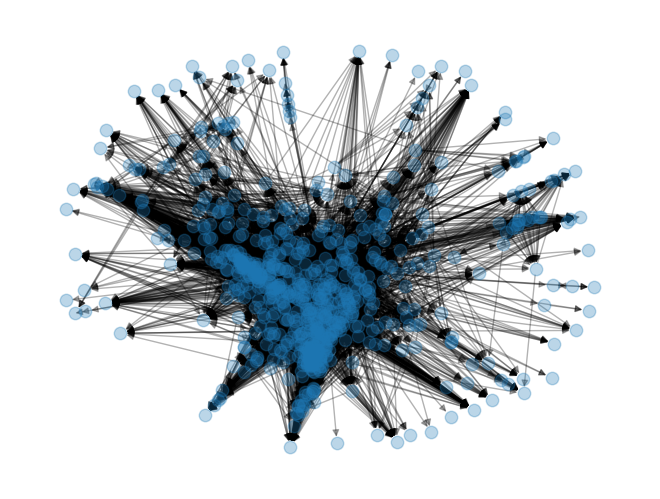

In [16]:
nx.draw(largests[2], node_size=80, alpha=0.3)

DiGraph with 998 nodes and 25577 edges: 3 max degree nodes removed


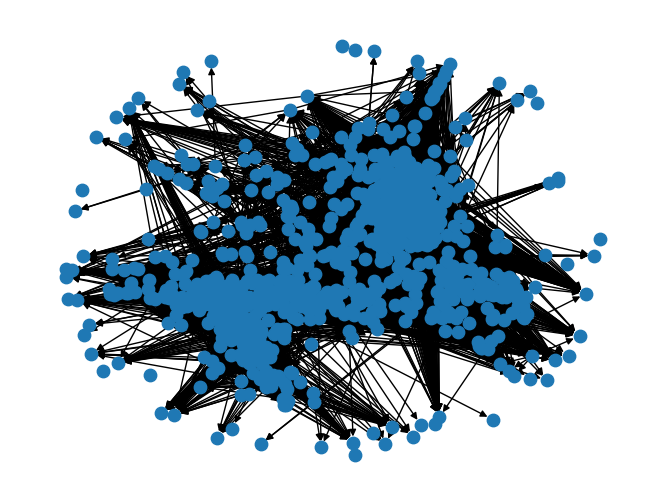

DiGraph with 750 nodes and 6491 edges: 3 max degree nodes removed


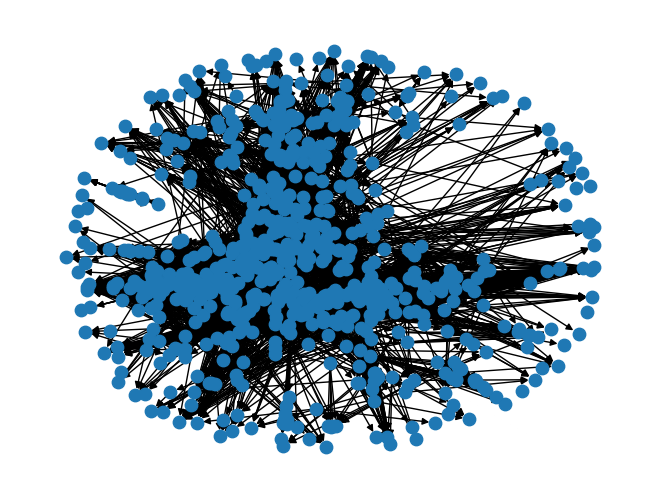

DiGraph with 744 nodes and 13386 edges: 3 max degree nodes removed


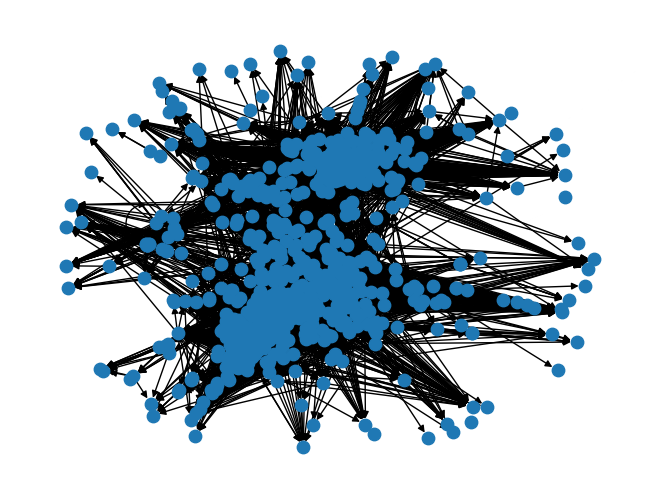

In [17]:
for i in [j.copy() for j in largests]:
    deg = nx.degree_centrality(i).items()
    top_degree = sorted(deg, key=lambda pair: pair[1], reverse=True)[0:3]
    top_degree = [i[0] for i in top_degree]
    i.remove_nodes_from(top_degree)
    print(f"{i}: 3 max degree nodes removed")
    nx.draw(i, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26723 edges: 3 max closeness nodes removed


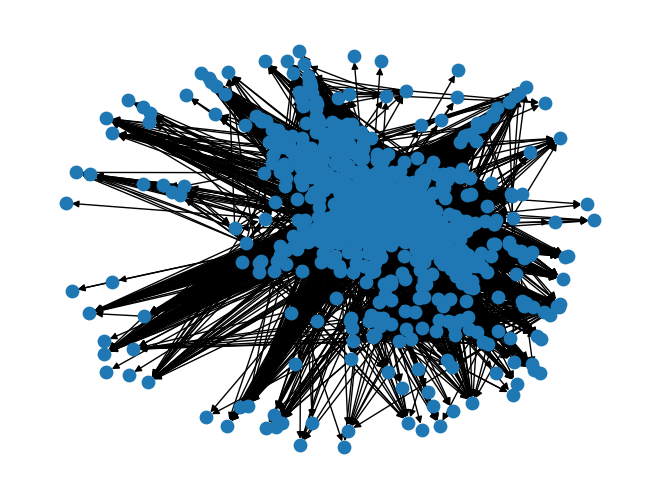

DiGraph with 750 nodes and 7186 edges: 3 max closeness nodes removed


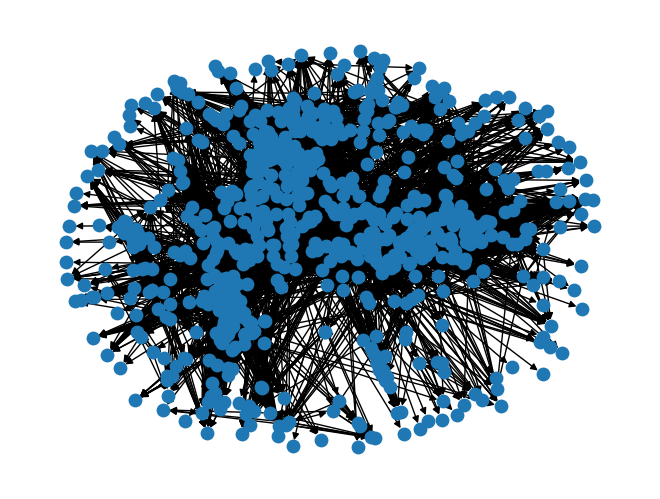

DiGraph with 744 nodes and 14127 edges: 3 max closeness nodes removed


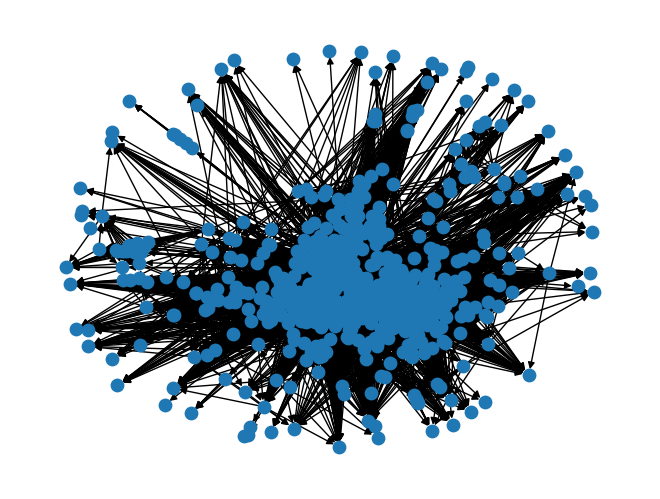

In [19]:
for i in [j.copy() for j in largests]:
    closeness = nx.closeness_centrality(i).items()
    top_closeness = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_closeness = [i[0] for i in top_closeness]
    i.remove_nodes_from(top_closeness)
    print(f"{i}: 3 max closeness nodes removed")
    nx.draw(i, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26586 edges: 3 max betweenness nodes removed


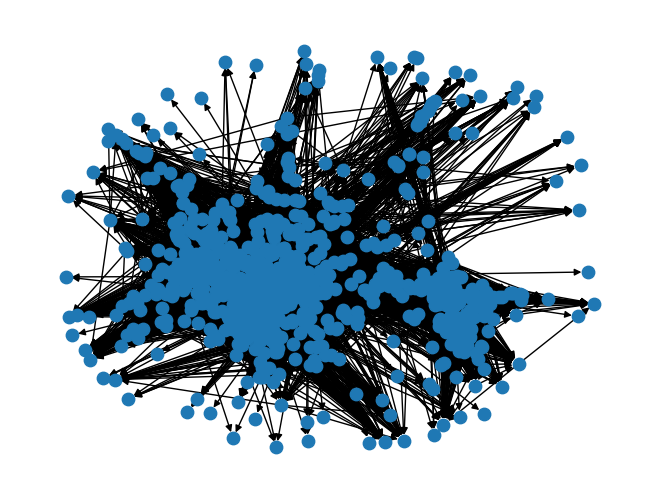

DiGraph with 750 nodes and 6625 edges: 3 max betweenness nodes removed


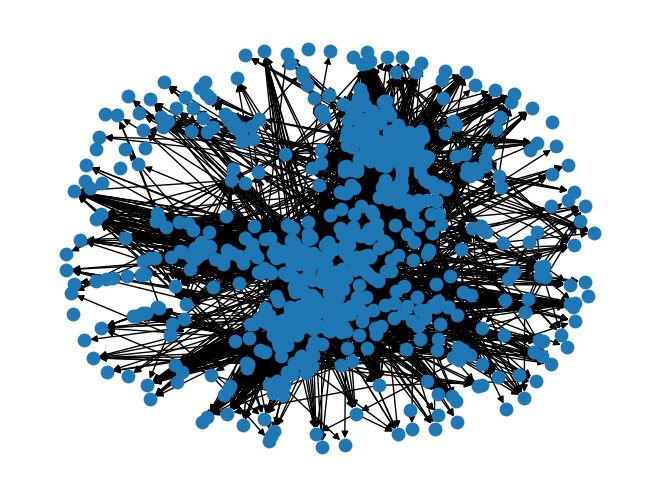

DiGraph with 744 nodes and 14179 edges: 3 max betweenness nodes removed


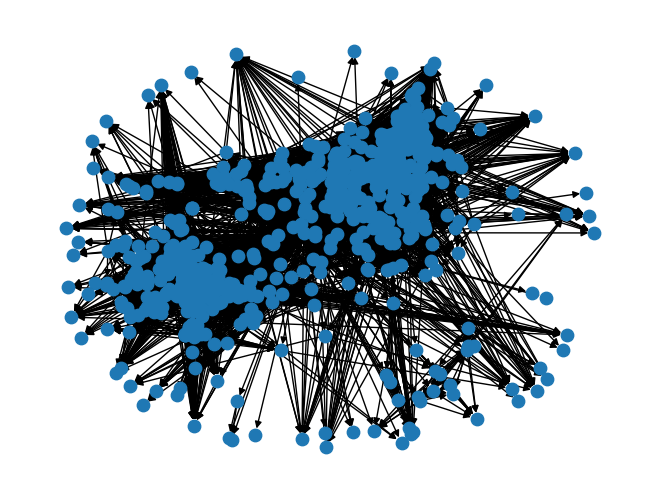

In [18]:
for i in [j.copy() for j in largests]:
    betweenness = nx.betweenness_centrality(i).items()
    top_betweenness = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_betweenness = [i[0] for i in top_betweenness]
    i.remove_nodes_from(top_betweenness)
    print(f"{i}: 3 max betweenness nodes removed")
    nx.draw(i, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26789 edges: 3 max eigenvector nodes removed


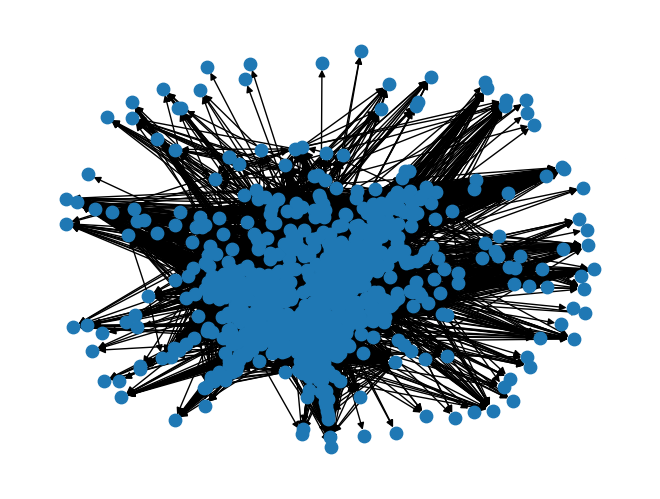

DiGraph with 750 nodes and 7183 edges: 3 max eigenvector nodes removed


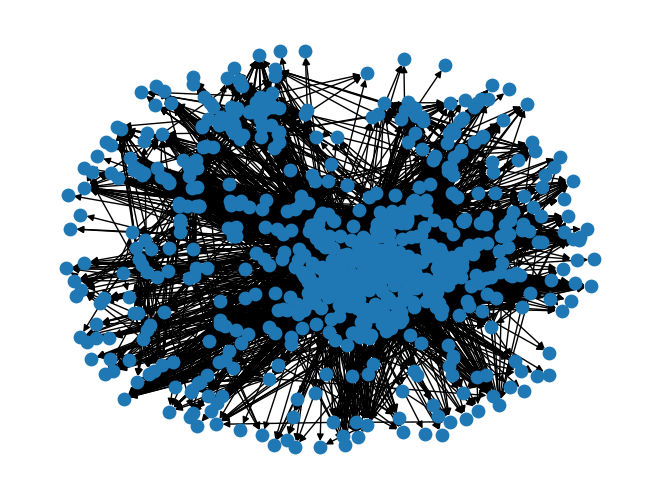

DiGraph with 744 nodes and 14189 edges: 3 max eigenvector nodes removed


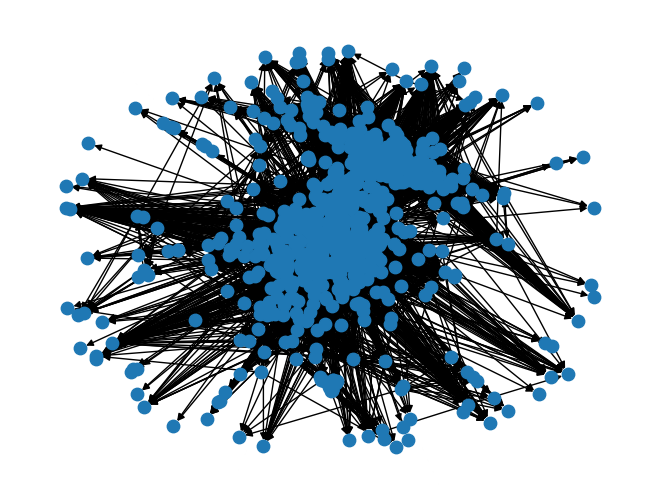

In [21]:
for i in [j.copy() for j in largests]:
    eigenvector = nx.eigenvector_centrality(i, max_iter=9000).items()
    top_eigenvector = sorted(eigenvector, key=lambda pair: pair[1], reverse=True)[0:3]
    top_eigenvector = [i[0] for i in top_eigenvector]
    i.remove_nodes_from(top_eigenvector)
    print(f"{i}: 3 max eigenvector nodes removed")
    nx.draw(i, node_size=80)
    plt.show()

### 10. Draw the influencers of those top 3 communities.

DiGraph with 1001 nodes and 27057 edges: top node with max closeness (1881, 0.3334852652259332)
DiGraph with 1001 nodes and 27057 edges: top node with max betweenness (1086, 0.021008218231951963)


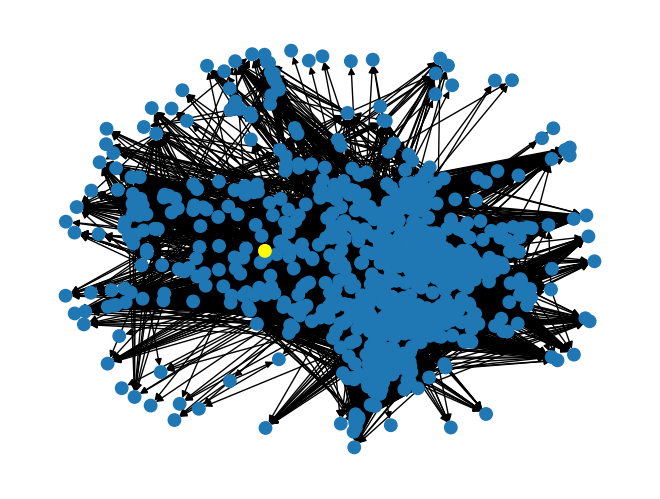

DiGraph with 753 nodes and 7312 edges: top node with max closeness (3948, 0.15646128576339816)
DiGraph with 753 nodes and 7312 edges: top node with max betweenness (3604, 0.012738103698395549)


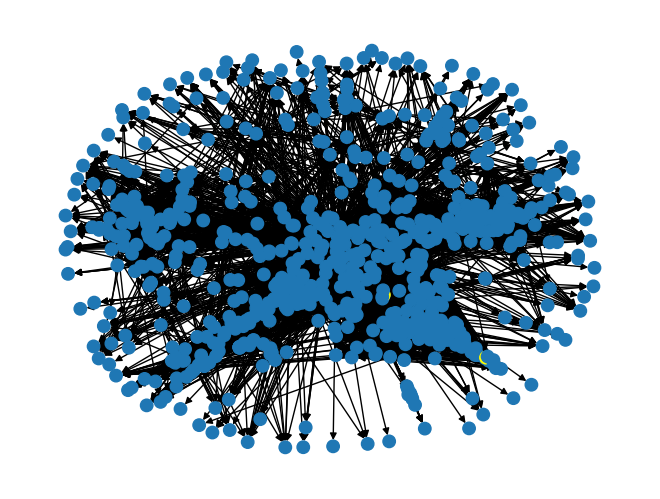

DiGraph with 747 nodes and 14397 edges: top node with max closeness (3397, 0.3098939790765014)
DiGraph with 747 nodes and 14397 edges: top node with max betweenness (2946, 0.029174094184520032)


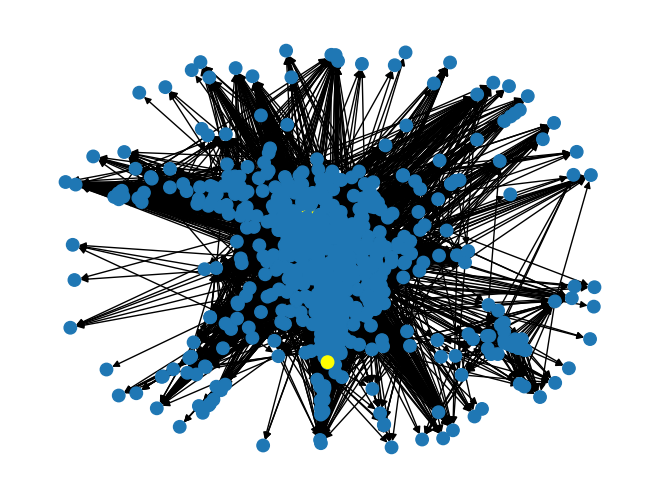

In [22]:
for i in largests:
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0]
    print(f"{i}: top node with max closeness {top_c}")
        
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0]
    print(f"{i}: top node with max betweenness {top_b}")
    
    top_i = list(top_c) + list(top_b)
    color_map= ['yellow' if node in top_i else 'tab:blue' for node in i.nodes]

    nx.draw(i, node_color=color_map, node_size=80)
    plt.show()

### 11. Design an action plan:  
a. Use hypothetical business (telecom, marketing agency, etc.)  
b. Use a hypothetical marketing budget  
c. Use a hypothetical cost per action (advertisement cost)  
d. Decide whom should you target?

a. Political sway generating company (lobbying)  
b. $250,000  
c. $75,000  
d. political entites most mentioned in news articles  